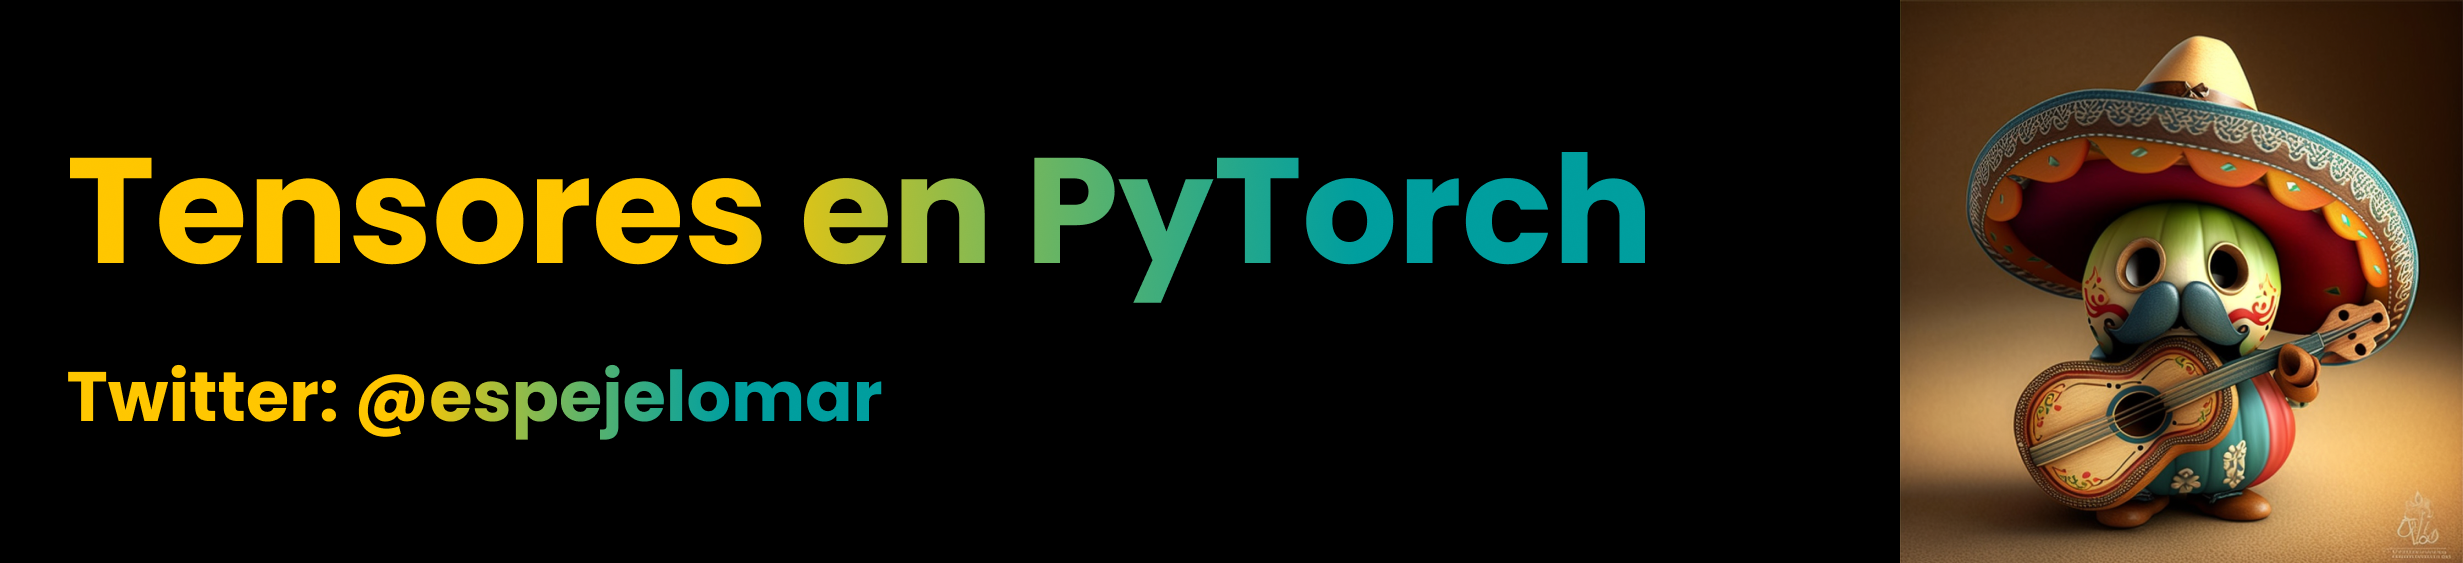

En el deep learning los tensores son como la gasolina de PyTorch. Básicamente, son una forma elegante de decir una matriz multidimensional que se puede usar para almacenar y manipular datos en PyTorch.

Los tensores son un componente clave para crear y entrenar modelos de machine learning, lo que permite realizar operaciones como la multiplicación de matrices y la multiplicación por elementos en grandes conjuntos de datos. También son útiles para tareas como el procesamiento de imágenes, donde puede representar una imagen como un tensor tridimensional de pixeles.

Pero aquí está la parte interesante, los tensores son súper flexibles y se pueden usar para todo tipo de datos, no solo para imágenes o números. Puedes usarlos para cosas como datos de texto, donde puede representar palabras como vectores o embeddings.

Al dominar los tensores, podrás abordar problemas de deep learning más complejos y desarrollar modelos más sofisticados. Entonces, prepárate para sumergirte profundamente en el mundo de los tensores y ¡continuemos nuestro viaje hacia el emocionante mundo de PyTorch!

---




## Ejemplo de capa con tensores

Mira este ejemplo de una capa de PyTorch que utiliza tensores para crear el bloque clave en la inteligencia artificial moderna, la *attention layer* en los modelos *Transformer*.

A lo largo del curso, lograremos entender lo que ocurre debajo de estos grandes modelos.



```python
class MultiHeadedAttention(nn.Module):
  def __init__(self, h, d_modelo):
    "Se reciben el número de cabezas (h) y las dimensiones de cada cabeza (d)"
    super(MultiHeadedAttention, self).__init__()
    self.h = h
    self.d_modelo = d_modelo
    self.linear_w0 = nn.Linear(d_modelo, d_modelo)

  def forward(self, query, key, value):
    "Definimos el grafo a seguir."
    query = query.view(-1, self.h, int(self.d_modelo / self.h)).transpose(1,2)
    key = key.view(-1, self.h, int(self.d_modelo / self.h)).transpose(1,2)
    value = value.view(-1, self.h, int(self.d_modelo / self.h)).transpose(1,2)

    z, _ = attention(query, key, value)

    z = z.transpose(1,2).contiguous().view(n_palabras, -1)

    z = linear_w0(z)

    return z




Vamos paso a paso.

## 1.1 Creando tensores

Importa PyTorch.

In [1]:
import torch

Revisemos la versión de PyTorch que estamos usando.

In [2]:
print(torch.__version__)

2.9.0+cu128


Los escalares, vectores, matrices y tensores son conceptos matemáticos que se utilizan en el deep learning y otros campos de la ciencia y la ingeniería.

Un escalar es un valor numérico único, como `3` o `5,7`.

Un vector es una matriz unidimensional de valores numéricos, como `[1, 2, 3]` o `[0.2, 0.5, 0.8]`.

Una matriz es una matriz bidimensional de valores numéricos, como `[[1, 2, 3], [4, 5, 6], [7, 8, 9]]` o `[[0.1, 0.2], [0.3, 0,4], [0,5, 0,6]]`.

Un tensor es una matriz multidimensional de valores numéricos, que se puede considerar como una generalización de vectores y matrices. 

Un escalar es un tensor de orden 0, un vector es un tensor de primer orden y una matriz es un tensor de segundo orden. Los tensores de orden superior, como un tensor de tercer orden o un tensor de cuarto orden, pueden representar estructuras de datos más complejas, como imágenes o videos.

Aquí hay una ilustración simple:

Escalar: `3`
Vector: `[1, 2, 3]`
Matriz: `[[1, 2], [3, 4], [5, 6]]`
Tensor: `[[[1, 2], [3, 4]], [[5, 6], [7, 8]]]`

Podemos representar estas estructuras de datos con PyTorch. Podemos crear tensores usando diferentes tipos de valores. Por ejemplo, random, ceros, o unos.

In [3]:
escalar = torch.rand(1)
vector = torch.zeros(1, 10)
matriz = torch.ones(2,2)

matriz

tensor([[1., 1.],
        [1., 1.]])

Pero también podemos representar estructuras sin nombre común:

In [4]:
t1 = torch.randn(5, 2, 4)

t1

tensor([[[-0.5600,  0.6105, -1.1651,  2.1295],
         [-0.9784, -0.0627,  0.8656,  1.0128]],

        [[ 2.4130,  1.2443,  0.9341, -0.6818],
         [-0.4149,  1.4833, -0.8539,  1.2110]],

        [[-0.2014,  0.9143,  2.9008, -1.5730],
         [-1.0895, -0.7982,  0.4723,  0.9200]],

        [[ 0.0836,  0.1264,  0.3347, -1.1646],
         [ 0.0412, -0.5536,  1.2577, -0.8971]],

        [[ 1.4386,  0.9060, -1.5625, -0.7144],
         [ 0.2576, -0.9702,  1.6752, -0.3806]]])

Podemos crear tensores con los valores que queramos, no necesariamente aleatorios.

In [5]:
torch.tensor([[2, 3], [4, 5]])

tensor([[2, 3],
        [4, 5]])

## Debugging operaciones con tensores

Cuando trabajamos con tensores y las operaciones resultan no válidas tendremos estos tres problemas más comunes:

1. El tamaño o forma.
2. El datatype.
3. El device (dispositivo) en el que se encuentra el tensor.

La forma (shape) te dice cómo están organizados los elementos dentro del tensor.

In [6]:
print(f"La shape de la matriz es {matriz.shape}")
print(f"La shape de t1 es {t1.shape}")

La shape de la matriz es torch.Size([2, 2])
La shape de t1 es torch.Size([5, 2, 4])


También podemos conocer la dimensión de un tensor.

In [7]:
print(f"La shape de la matriz es {matriz.ndim}")
print(f"La shape de t1 es {t1.ndim}")

La shape de la matriz es 2
La shape de t1 es 3


Los tensores pueden tener elementos con diferentes types. Es importante saber qué type estamos usando.

In [8]:
print(f"El tensor matriz tiene elementos de tipo: {matriz.dtype}")

El tensor matriz tiene elementos de tipo: torch.float32


Hay muchos tipos de datos de tensor diferentes disponibles en PyTorch.

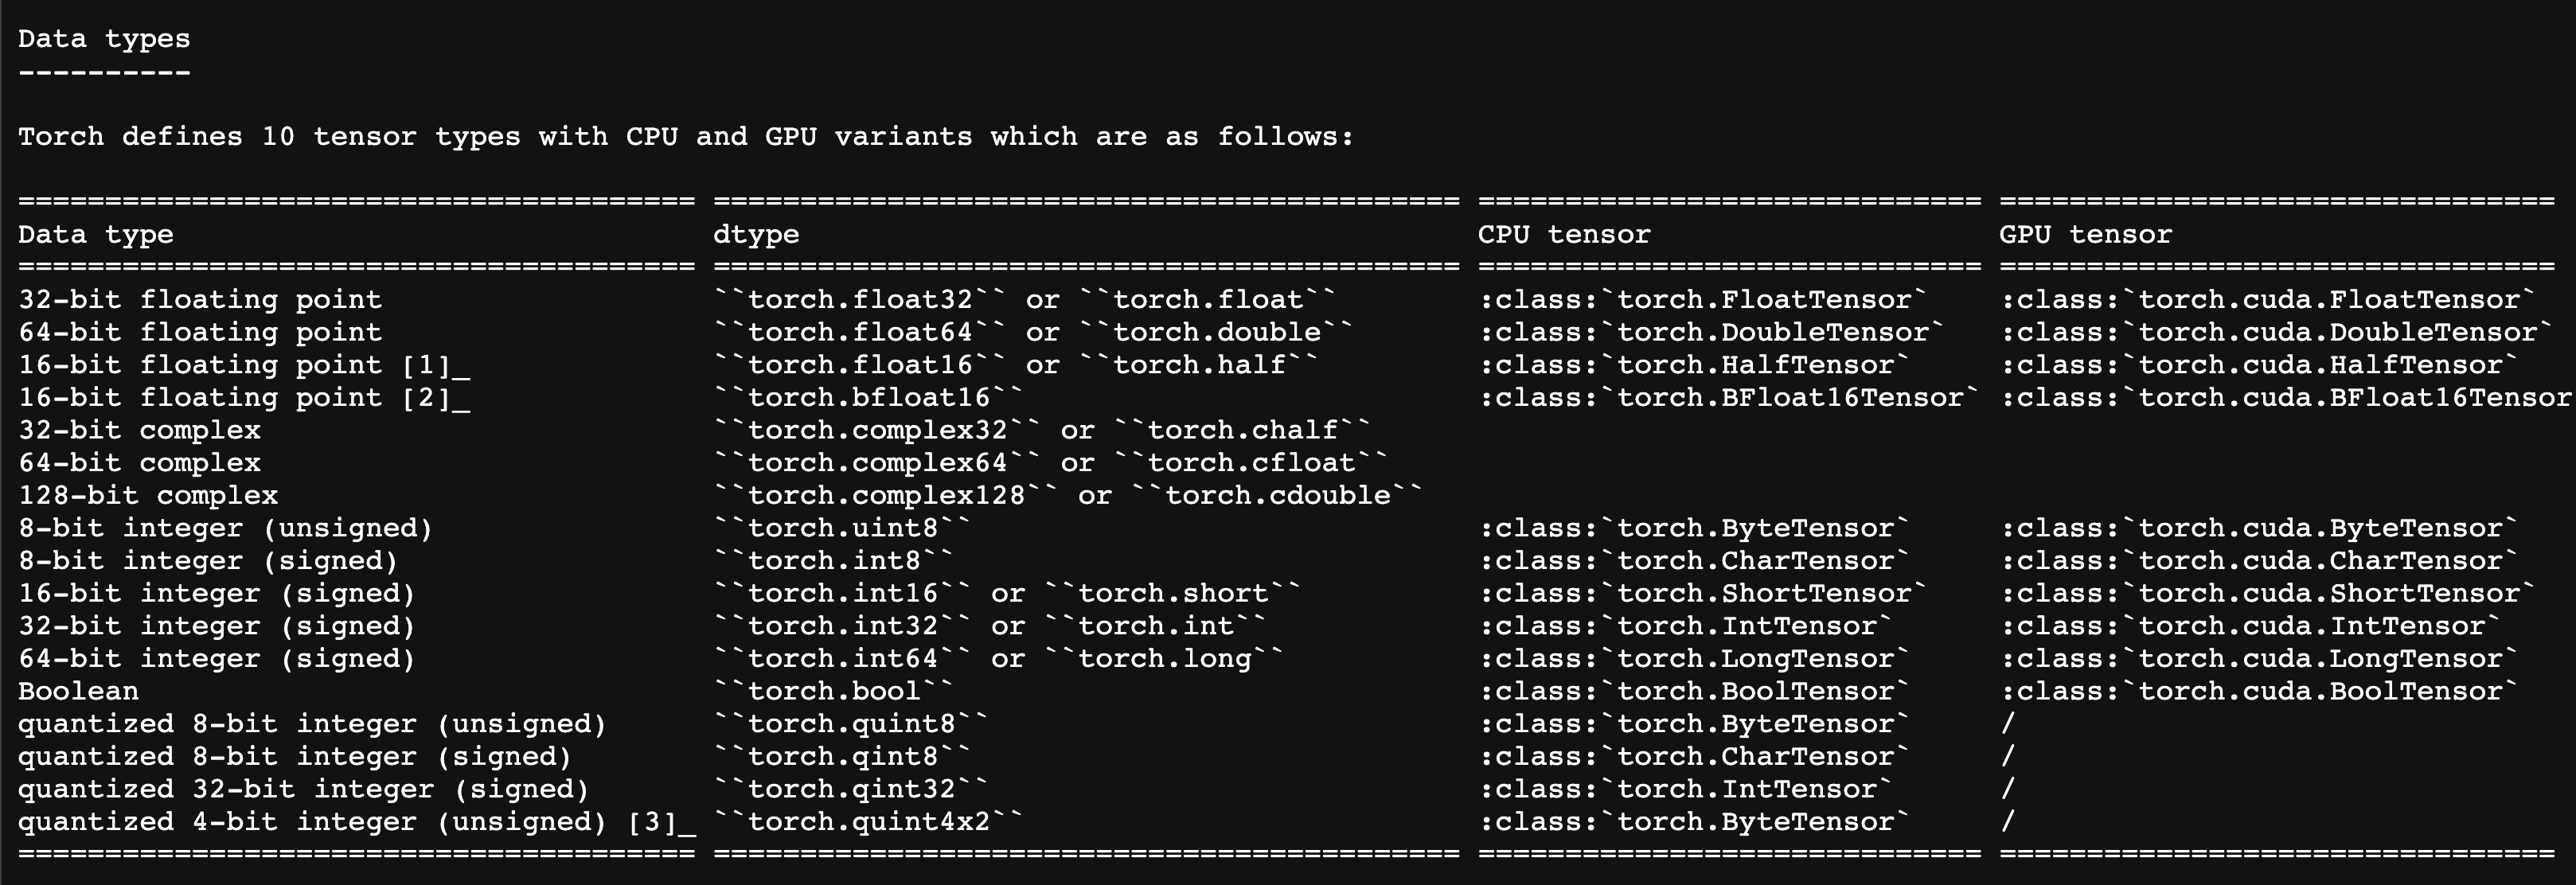

El type más común es `torch.float` o `torch.float32` (float de 32 bits). Cuando hablamos de bits estamos tratando con el tamaño de la información necesaria para representar un número. En machine learning trabajamos con miles de números, por lo que elegir el tamaño ideal es clave. 

**La regla es:** los tipos de datos de menores bits (es decir, de menor precisión) son más rápidos de calcular pero sacrifican precisión (más rápido de calcular, pero menos preciso).

Normalmente, cuando operamos entre tensores, PyTorch convierte los tensores a tipos compatibles pero es importante que tengamos presente el tipo de los tensores para evitar errores futuros.

In [9]:
matriz_float32 = torch.tensor([[3.1, 3.2], [3.3, 3.4]])
matriz_uint64 = torch.tensor([[3, 3], [3, 3]])

matriz_float32.dtype, matriz_uint64.dtype

(matriz_float32 + matriz_uint64).dtype

torch.float32

Si es necesario, podemos usar `y = y.to(...)` para convertir los tensores a diferentes types.

In [10]:
matriz_uint64.to(torch.float32)

tensor([[3., 3.],
        [3., 3.]])

Tenemos que tener en cuenta el dispositivo para el que nuestro tensor está preparado. No podemos operar con un tensor diseñado para GPU (CUDA) y uno para CPU.

In [11]:
matriz_uint64.device

device(type='cpu')

Revisamos si tenemos un GPU disponible con `cuda.is_available()`.

CUDA es una plataforma de computación paralela y una interfaz de programación de aplicaciones (API) que nos permite aprovechar la potencia de las GPU para tareas de deep learning. Cuando usamos CUDA podemos realizar operaciones matemáticas complejas en paralelo en la GPU, lo que puede acelerar significativamente el entrenamiento y la inferencia de modelos de machine learning.

Al usar CUDA, podemos aprovechar las capacidades masivas de procesamiento paralelo de las GPU y entrenar modelos mucho más rápido de lo que podríamos usar solo la CPU. Google Colab nos permite usar una GPU sin costo.

In [12]:
torch.cuda.is_available()

True

El siguiente código, revisaremos si tenemos CUDA disponible y, si sí, convertimos tensores de CPU a CUDA y viceversa, a la vez que también cambiamos el type.

Nos retornará error porque no podemos operar con tensores en diferentes devices.

In [13]:
if torch.cuda.is_available():
    matriz_uint64_cuda = matriz_uint64.to(torch.device("cuda"))
    
    print(matriz_uint64_cuda, matriz_uint64_cuda.dtype)
    print(matriz_uint64_cuda.to(torch.device("cpu"), torch.float32))

tensor([[3, 3],
        [3, 3]], device='cuda:0') torch.int64
tensor([[3., 3.],
        [3., 3.]])


In [14]:
matriz_uint64_cuda + matriz_uint64

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

## 1.2 Interacción con NumPy

Convierte el tensor a NumPy.

In [15]:
print(matriz.numpy())
print(type(matriz.numpy()))

[[1. 1.]
 [1. 1.]]
<class 'numpy.ndarray'>


Importa NumPy.

In [16]:
import numpy as np

Nota que podemos convertir también de NumPy a PyTorch y el type se mantiene.

In [17]:
vector = np.ones(5)
torch.from_numpy(vector)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

## Operaciones con tensores

Primero creemos algunos tensores en PyTorch:

In [18]:
# create a tensor of zeros with shape (3, 4)
zeros_tensor = torch.zeros((3, 4))

# create a tensor of ones with shape (3, 4)
ones_tensor = torch.ones((3, 4))

# create a tensor of random values with shape (2, 2)
random_tensor = torch.randn((4))

In [19]:
random_tensor

tensor([-2.4955, -0.8548, -0.4184, -1.5242])

Hagamos operaciones "element-wise":

In [20]:
# add two tensors element-wise
added_tensor = zeros_tensor + ones_tensor

# subtract two tensors element-wise
subtracted_tensor = zeros_tensor - ones_tensor

# multiply two tensors element-wise
multiplied_tensor = zeros_tensor * ones_tensor

# divide two tensors element-wise
divided_tensor = torch.randn((4)) / ones_tensor

In [21]:
divided_tensor


tensor([[ 1.3016, -0.2282, -0.2136, -0.0240],
        [ 1.3016, -0.2282, -0.2136, -0.0240],
        [ 1.3016, -0.2282, -0.2136, -0.0240]])

Multiplicación de matrices:

In [22]:
# create two matrices
matrix1 = torch.randn(2,3)
matrix2 = torch.randn(3,2)

print(f"matrix1 shape: {matrix1.shape}")
print(f"matrix2 shape: {matrix2.shape}")

# perform matrix multiplication
torch.matmul(matrix1, matrix2) , torch.matmul(matrix2, matrix1)

matrix1 shape: torch.Size([2, 3])
matrix2 shape: torch.Size([3, 2])


(tensor([[0.6264, 1.1046],
         [1.3073, 1.7489]]),
 tensor([[ 2.2592, -0.4226, -0.1135],
         [-0.7449,  0.0344,  0.0120],
         [-2.6030,  0.2843,  0.0817]]))

Estos son solo algunos ejemplos de los tipos de operaciones que puedes realizar en los tensores de PyTorch. También puedes realizar otras operaciones como tomar la transposición de un tensor, cambiar la forma un tensor y más.

Recuerda prestar siempre atención a la forma y los tipos de datos de tus tensores cuando realices operaciones.

## Conclusión

¡Felicidades! Acabas de completar una lección en este curso PyTorch donde aprendiste cómo crear y usar tensores.

Al dominar los tensores puedes realizar una amplia gama de operaciones matemáticas en grandes conjuntos de datos, lo que hace posible crear modelos complejos que pueden abordar una variedad de problemas de deep learning. 

En el futuro utilizarás tu conocimiento de los tensores para crear modelos más sofisticados en PyTorch y abordar problemas cada vez más complejos.

Recuerda practicar la creación y manipulación de tensores por tu cuenta y experimenta con diferentes tipos de datos y operaciones. Cuanto más cómodo te sientas con los tensores, más éxito tendrás en la creación de modelos de machine learning potentes y precisos.